In [72]:
import pandas as pd
import numpy as np
%pylab inline

df = pd.read_csv('Desktop/train.csv', header = 0)
test_df = pd.read_csv('Desktop/test.csv', header = 0)

Populating the interactive namespace from numpy and matplotlib


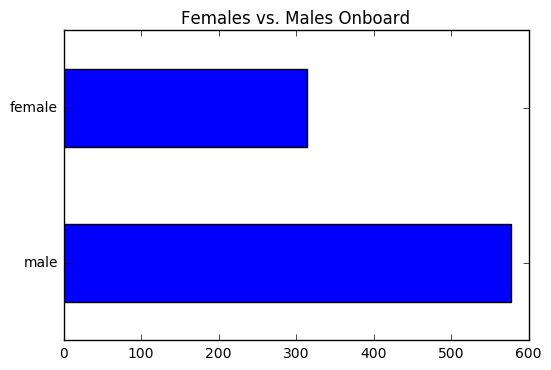

In [73]:
df.Sex.value_counts().plot(kind = 'barh', title = 'Females vs. Males Onboard')

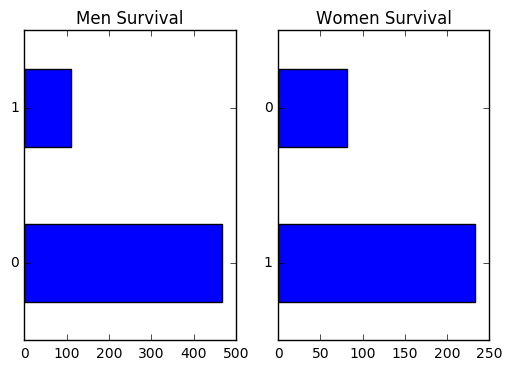

In [74]:
fig, axs = plt.subplots(1,2)
df[df['Sex'] == 'male'].Survived.value_counts().plot(kind = 'barh', title = 'Men Survival', ax = axs[0])
df[df['Sex'] == 'female'].Survived.value_counts().plot(kind = 'barh', title = 'Women Survival', ax = axs[1])

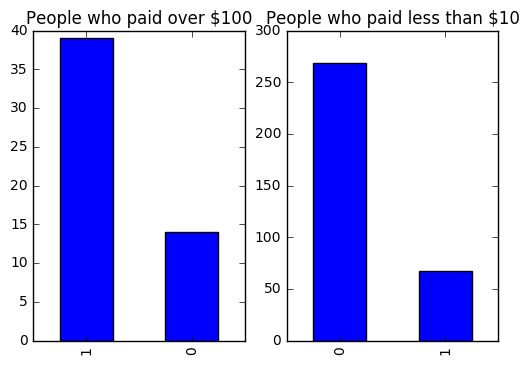

In [75]:
fig, axs = plt.subplots(1,2)
df[df['Fare'] > 100].Survived.value_counts().plot(kind = 'bar', title = 'People who paid over $100', ax = axs[0])
df[df['Fare'] < 10].Survived.value_counts().plot(kind = 'bar', title = 'People who paid less than $10', ax = axs[1])

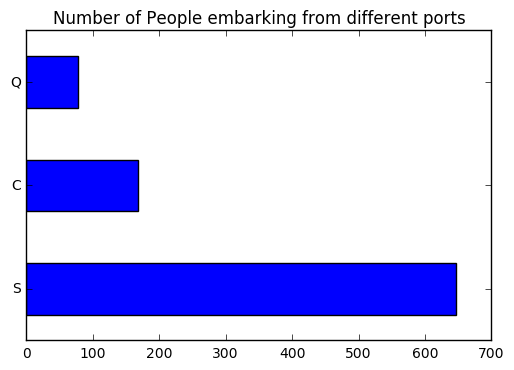

In [76]:
avg_Embark = "S"
df.Embarked = df.Embarked.fillna(value = avg_Embark)
df.Embarked.value_counts().plot(kind = 'barh', title = 'Number of People embarking from different ports')

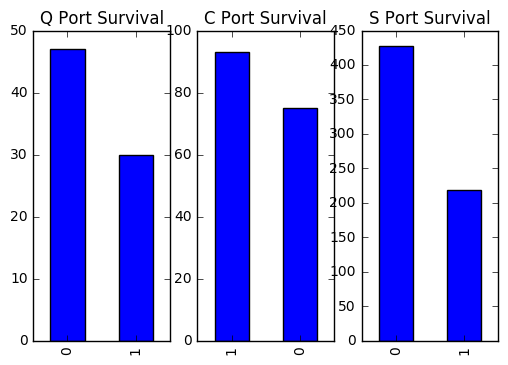

In [77]:
fig, axs = plt.subplots(1,3)
df[df['Embarked'] == 'Q'].Survived.value_counts().plot(kind = 'bar', title = 'Q Port Survival', ax = axs[0])
df[df['Embarked'] == 'C'].Survived.value_counts().plot(kind = 'bar', title = 'C Port Survival', ax = axs[1])
df[df['Embarked'] == 'S'].Survived.value_counts().plot(kind = 'bar', title = 'S Port Survival', ax = axs[2])

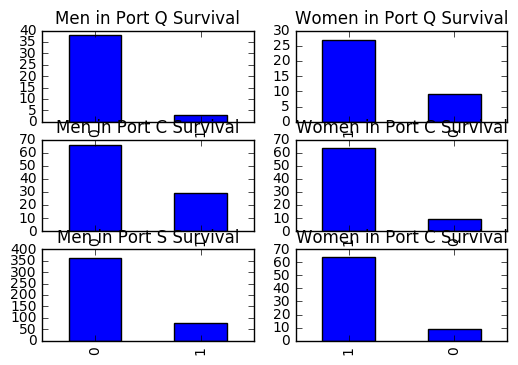

In [78]:
fig, axs = plt.subplots(3,2)
df[(df['Embarked'] == 'Q') & (df.Sex == 'male')].Survived.value_counts().plot(kind = 'bar', title = 'Men in Port Q Survival', ax = axs[0][0])
df[(df['Embarked'] == 'Q') & (df.Sex == 'female')].Survived.value_counts().plot(kind = 'bar', title = 'Women in Port Q Survival', ax = axs[0][1])

df[(df['Embarked'] == 'C') & (df.Sex == 'male')].Survived.value_counts().plot(kind = 'bar', title = 'Men in Port C Survival', ax = axs[1][0])
df[(df['Embarked'] == 'C') & (df.Sex == 'female')].Survived.value_counts().plot(kind = 'bar', title = 'Women in Port C Survival', ax = axs[1][1])

df[(df['Embarked'] == 'S') & (df.Sex == 'male')].Survived.value_counts().plot(kind = 'bar', title = 'Men in Port S Survival', ax = axs[2][0])
df[(df['Embarked'] == 'C') & (df.Sex == 'female')].Survived.value_counts().plot(kind = 'bar', title = 'Women in Port C Survival', ax = axs[2][1])

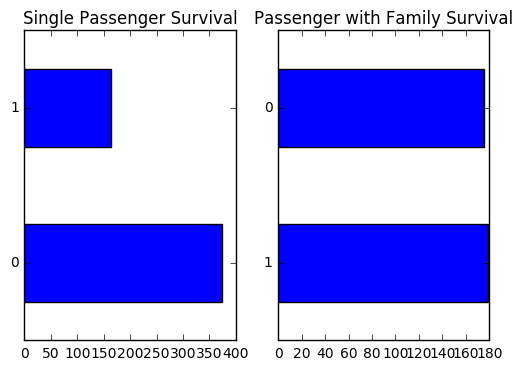

In [79]:
fig, axs = plt.subplots(1,2)
df['Family'] = df.Parch + df.SibSp
df[df['Family'] == 0].Survived.value_counts().plot(kind = 'barh', ax = axs[0], title = 'Single Passenger Survival')
df[df['Family'] > 0].Survived.value_counts().plot(kind = 'barh', ax = axs[1], title = 'Passenger with Family Survival')

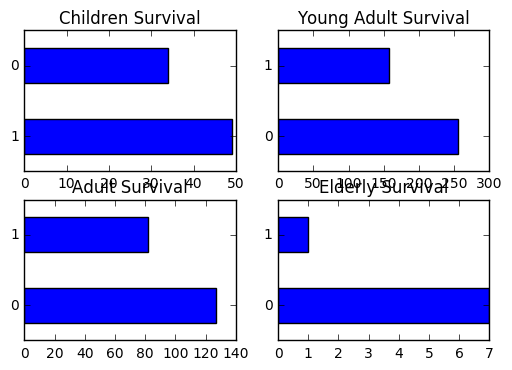

In [80]:
children = df[df.Age < 16]
young_adults = df[((df.Age > 15) & (df.Age < 36))]
adults = df[((df.Age > 35) & (df.Age < 66))]
elderly = df[(df.Age > 65)]

fg, axs = plt.subplots(2,2)
children.Survived.value_counts().plot(kind = 'barh', ax = axs[0][0], title = 'Children Survival')
young_adults.Survived.value_counts().plot(kind = 'barh', ax = axs[0][1], title = 'Young Adult Survival')
adults.Survived.value_counts().plot(kind = 'barh', ax = axs[1][0], title = 'Adult Survival')
elderly.Survived.value_counts().plot(kind = 'barh', ax = axs[1][1], title = 'Elderly Survival')

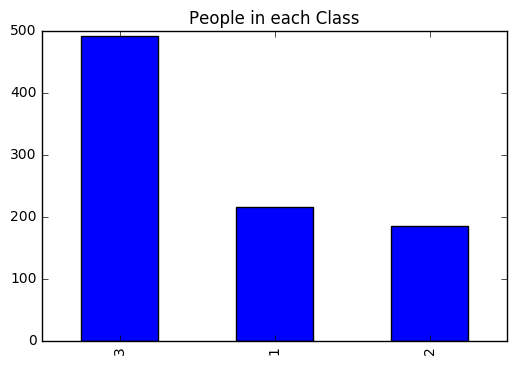

In [81]:
df.Pclass.value_counts().plot(kind = 'bar', title = 'People in each Class')

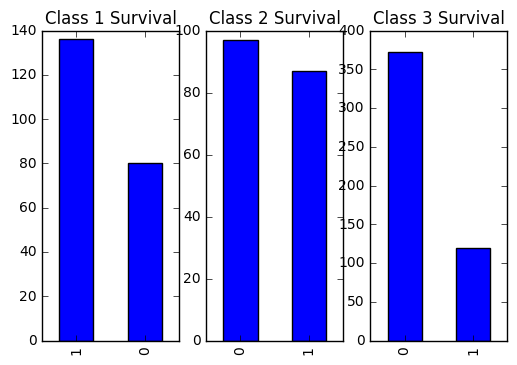

In [82]:
fig, axs = plt.subplots(1,3)
df[df['Pclass'] == 1].Survived.value_counts().plot(kind = 'bar', title = 'Class 1 Survival', ax = axs[0])
df[df['Pclass'] == 2].Survived.value_counts().plot(kind = 'bar', title = 'Class 2 Survival', ax = axs[1])
df[df['Pclass'] == 3].Survived.value_counts().plot(kind = 'bar', title = 'Class 3 Survival', ax = axs[2])

In [127]:
from sklearn.ensemble import RandomForestClassifier

# having issues running code, so i have to re-import my csv files
df = pd.read_csv('Desktop/train.csv', header = 0)
test_df = pd.read_csv('Desktop/test.csv', header = 0)

# gender
df['Gender']  = df.Sex.map({"female" : 0,"male" : 1}).astype(int)
test_df['Gender']  = test_df.Sex.map({"female" : 0,"male" : 1}).astype(int)

# substituting avg fare into missing fare
train_fare_avg = df.Fare.mean()
df.Fare = df.Fare.fillna(value = train_fare_avg)
test_fare_avg = test_df['Fare'].mean()
test_df.Fare = test_df.Fare.fillna(value = test_fare_avg)



# family
df['Family'] = df.Parch + df.SibSp
test_df['Family'] = test_df.Parch + test_df.SibSp
df = df.drop(['Parch', 'SibSp'], axis = 1)
test_df = test_df.drop(['Parch','SibSp'], axis = 1)

# mapping emabrked
avg_Embark = "S"
df.Embarked = df.Embarked.fillna(value = avg_Embark)
embark_dummies_titanic  = pd.get_dummies(df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

df = df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

# classes
pclass_dummies_titanic  = pd.get_dummies(df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

df = df.join(pclass_dummies_titanic)
test_df = test_df.join(pclass_dummies_test)

# age
med_avg_train = df.Age.median()
med_avg_test = test_df.Age.median()
df.Age = df.Age.fillna(value = med_avg_train)
test_df.Age = test_df.Age.fillna(value = med_avg_test)

# gender and age
def get_type(passenger):
    age, sex = passenger
    if (age < 16):
        return 'child'
    elif (age > 60):
        return 'elderly'
    else:
        return sex

# creating new person column classifying whether person is child, male, or female
df['Person'] = df[['Age','Sex']].apply(get_type, axis = 1)
test_df['Person'] = test_df[['Age','Sex']].apply(get_type, axis = 1)

# no need for the sex column
df.drop(['Sex'], axis = 1, inplace = True)
test_df.drop(['Sex'], axis = 1, inplace = True)


# create new dummy variable for person column
person_dummies = pd.get_dummies(df['Person'])
person_dummies_test = pd.get_dummies(test_df['Person'])

# drop males and elderly bc they all died basically
person_dummies.columns = ['Child', 'Elderly', 'Female','Male']
person_dummies.drop(['Male','Elderly'], axis = 1, inplace = True)

person_dummies_test.columns = ['Child', 'Elderly', 'Female','Male']
person_dummies_test.drop(['Male','Elderly'], axis = 1, inplace = True)

df = df.join(person_dummies)
test_df = test_df.join(person_dummies_test)

df = df.drop(['Person'], axis = 1)
test_df = test_df.drop(['Person'], axis = 1)


Y = df['Survived']

df = df.drop(['Name','Ticket', 'Cabin', 'Survived'], axis = 1)
df = df.dropna()

test_df = test_df.drop(['Name', 'Ticket','Cabin'], axis = 1)
test_df = test_df.dropna()

train_data = df.values
test_data = test_df.values

rf_model = RandomForestClassifier(n_estimators = 100, max_features = 4,
                                 oob_score = True)

rf_model.fit(train_data, Y)
print("OOB accuracy: ", rf_model.oob_score_)

OOB accuracy:  0.826038159371
